In [17]:
import pandas as pd

# Load the Excel file
file_path = "ECOMM DATA.xlsx"  # Ensure this matches the uploaded filename
xls = pd.ExcelFile(file_path)

# Load each sheet
orders_df = pd.read_excel(xls, sheet_name="Orders")
returns_df = pd.read_excel(xls, sheet_name="Returns")
people_df = pd.read_excel(xls, sheet_name="People")

# Display first few rows
orders_df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [18]:
orders_df.drop(columns=["Postal Code"],inplace=True)

In [19]:
print(orders_df.isnull().sum())  # Check missing values in Orders
print(returns_df.isnull().sum())  # Check missing values in Returns
print(people_df.isnull().sum())  # Check missing values in People


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64
Returned    0
Order ID    0
Market      0
dtype: int64
Person    0
Region    0
dtype: int64


In [20]:
# Step 1: Compute Total Revenue
orders_df["Total Revenue"] = orders_df["Sales"] + orders_df["Shipping Cost"]

# Step 2: Check total revenue
total_revenue = orders_df["Total Revenue"].sum()
total_sales = orders_df["Sales"].sum()

print(f"Total Sales (excluding Shipping): ₹{total_sales:,.2f}")
print(f"Total Revenue (including Shipping): ₹{total_revenue:,.2f}")


Total Sales (excluding Shipping): ₹12,642,501.91
Total Revenue (including Shipping): ₹13,995,317.61


In [21]:
import matplotlib.pyplot as plt

# Step 1: Convert 'Order Date' to datetime format
orders_df["Order Date"] = pd.to_datetime(orders_df["Order Date"])
# Step 2: Extract Year & Month
orders_df["Year-Month"] = orders_df["Order Date"].dt.to_period("M")

print(orders_df["Year-Month"].head(10))
monthly_sales = orders_df.groupby("Year-Month")["Sales"].sum()
print(monthly_sales)



0    2012-07
1    2013-02
2    2013-10
3    2013-01
4    2013-11
5    2013-06
6    2011-11
7    2012-04
8    2014-10
9    2012-01
Name: Year-Month, dtype: period[M]
Year-Month
2011-01     98898.48886
2011-02     91152.15698
2011-03    145729.36736
2011-04    116915.76418
2011-05    146747.83610
2011-06    215207.38022
2011-07    115510.41912
2011-08    207581.49122
2011-09    290214.45534
2011-10    199071.26404
2011-11    298496.53752
2011-12    333925.73460
2012-01    135780.72024
2012-02    100510.21698
2012-03    163076.77116
2012-04    161052.26952
2012-05    208364.89124
2012-06    256175.69842
2012-07    145236.78512
2012-08    303142.94238
2012-09    289389.16564
2012-10    252939.85020
2012-11    323512.41690
2012-12    338256.96660
2013-01    199185.90738
2013-02    167239.65040
2013-03    198594.03012
2013-04    177821.31684
2013-05    260498.56470
2013-06    396519.61190
2013-07    229928.95200
2013-08    326488.78936
2013-09    376619.24568
2013-10    293406.64288
2013-11 

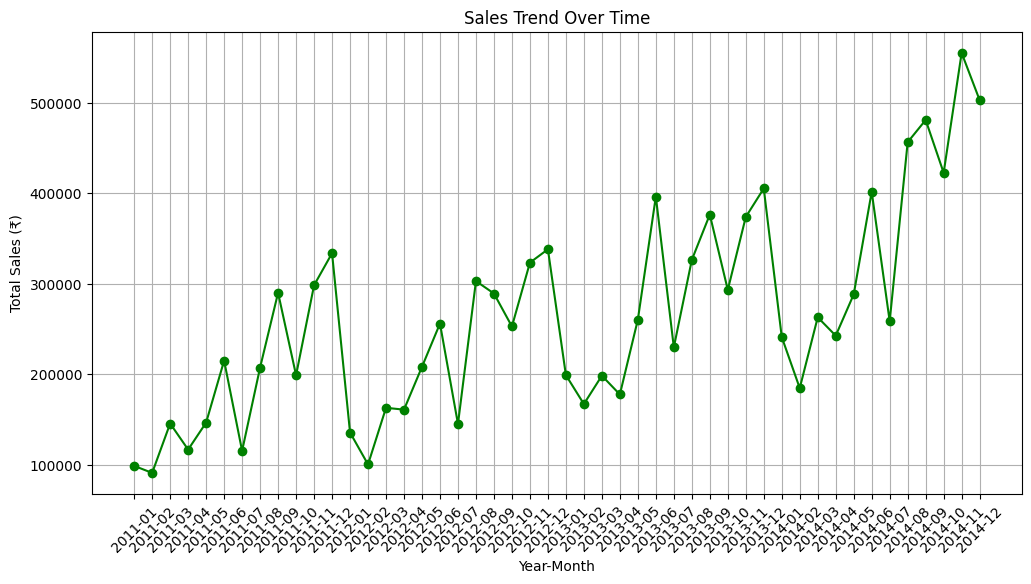

In [22]:
import matplotlib.pyplot as plt

# Step 1: Convert 'Order Date' to datetime format
orders_df["Order Date"] = pd.to_datetime(orders_df["Order Date"])

# Step 2: Extract Year & Month
orders_df["Year-Month"] = orders_df["Order Date"].dt.to_period("M")

# Step 3: Group by Year-Month and calculate total sales
monthly_sales = orders_df.groupby("Year-Month")["Sales"].sum()

# Step 4: Plot the Sales Trend Over Time
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker="o", linestyle="-", color="g")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.xlabel("Year-Month")
plt.ylabel("Total Sales (₹)")
plt.title("Sales Trend Over Time")
plt.grid()
plt.show()


In [23]:
product_sales = orders_df.groupby("Product Name")[["Sales", "Profit"]].sum()
top_selling_products = product_sales.sort_values(by="Sales", ascending=False).head(10)
top_profitable_products = product_sales.sort_values(by="Profit", ascending=False).head(10)
print (top_selling_products)
print (top_profitable_products)

                                                         Sales      Profit
Product Name                                                              
Apple Smart Phone, Full Size                        86935.7786   5921.5786
Cisco Smart Phone, Full Size                        76441.5306  17238.5206
Motorola Smart Phone, Full Size                     73156.3030  17027.1130
Nokia Smart Phone, Full Size                        71904.5555   9938.1955
Canon imageCLASS 2200 Advanced Copier               61599.8240  25199.9280
Hon Executive Leather Armchair, Adjustable          58193.4841   5997.2541
Office Star Executive Leather Armchair, Adjustable  50661.6840   4710.9840
Harbour Creations Executive Leather Armchair, A...  50121.5160  10427.3260
Samsung Smart Phone, Cordless                       48653.4600   -198.0900
Nokia Smart Phone, with Caller ID                   47877.7857   9465.3257
                                                         Sales      Profit
Product Name             

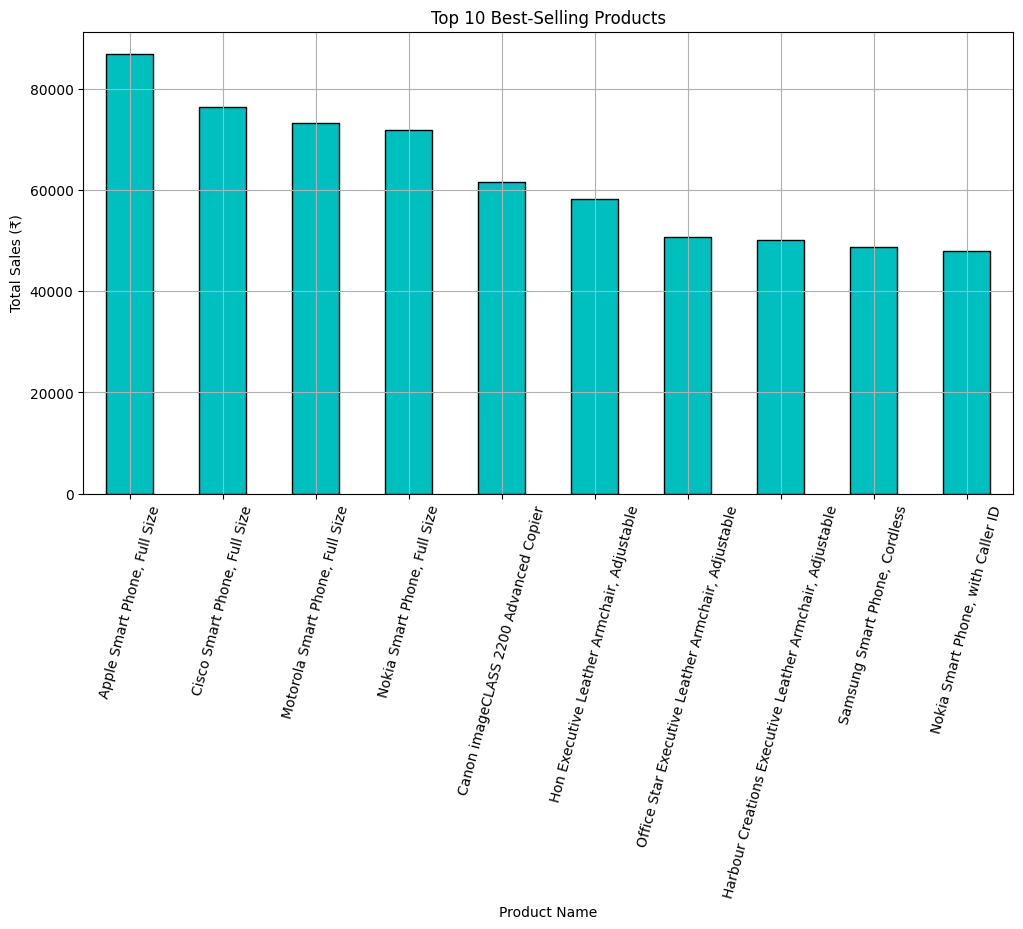

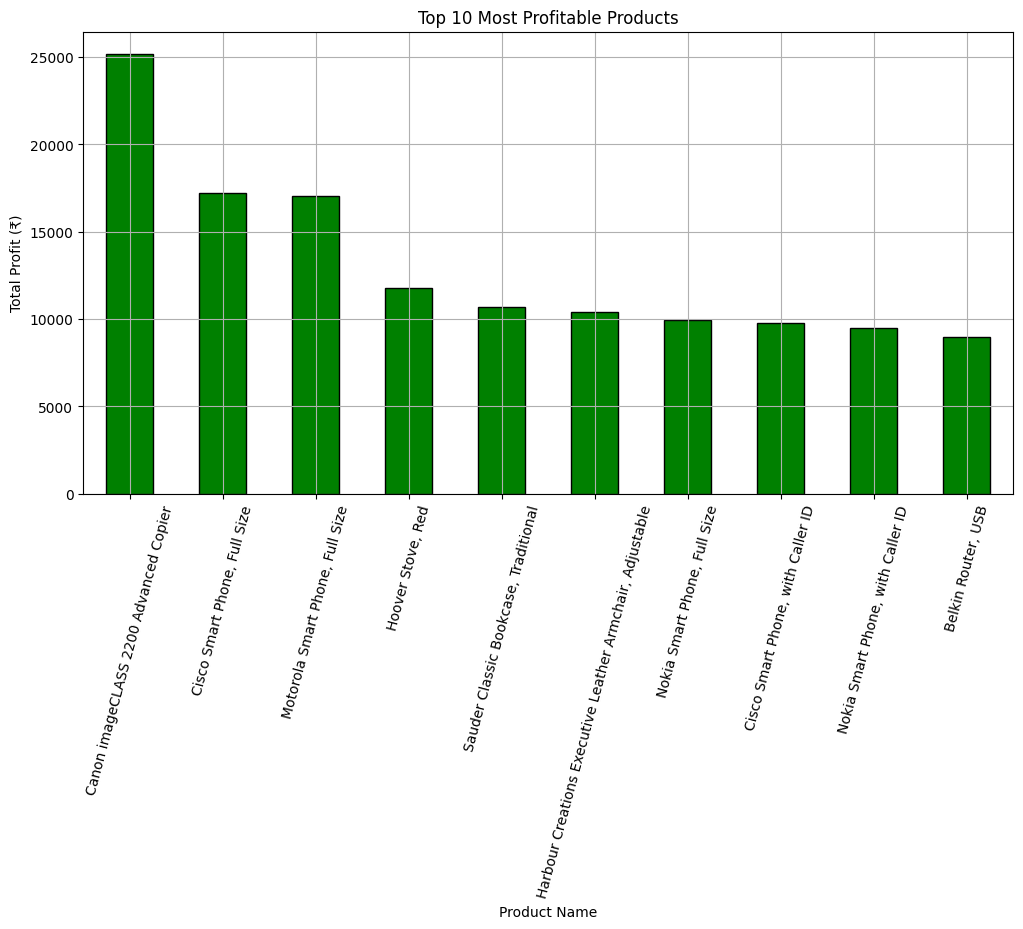

In [24]:
# Step 1: Group by Product Name and calculate total sales & profit
product_sales = orders_df.groupby("Product Name")[["Sales", "Profit"]].sum()

# Step 2: Get the top 10 best-selling products (by Sales ₹)
top_selling_products = product_sales.sort_values(by="Sales", ascending=False).head(10)

# Step 3: Get the top 10 most profitable products (by Profit ₹)
top_profitable_products = product_sales.sort_values(by="Profit", ascending=False).head(10)

# Step 4: Plot the Top 10 Best-Selling Products
plt.figure(figsize=(12, 6))
top_selling_products["Sales"].plot(kind="bar", color="c", edgecolor="black")
plt.xlabel("Product Name")
plt.ylabel("Total Sales (₹)")
plt.title("Top 10 Best-Selling Products")
plt.xticks(rotation=75)
plt.grid()
plt.show()

# Step 5: Plot the Top 10 Most Profitable Products
plt.figure(figsize=(12, 6))
top_profitable_products["Profit"].plot(kind="bar", color="g", edgecolor="black")
plt.xlabel("Product Name")
plt.ylabel("Total Profit (₹)")
plt.title("Top 10 Most Profitable Products")
plt.xticks(rotation=75)
plt.grid()
plt.show()


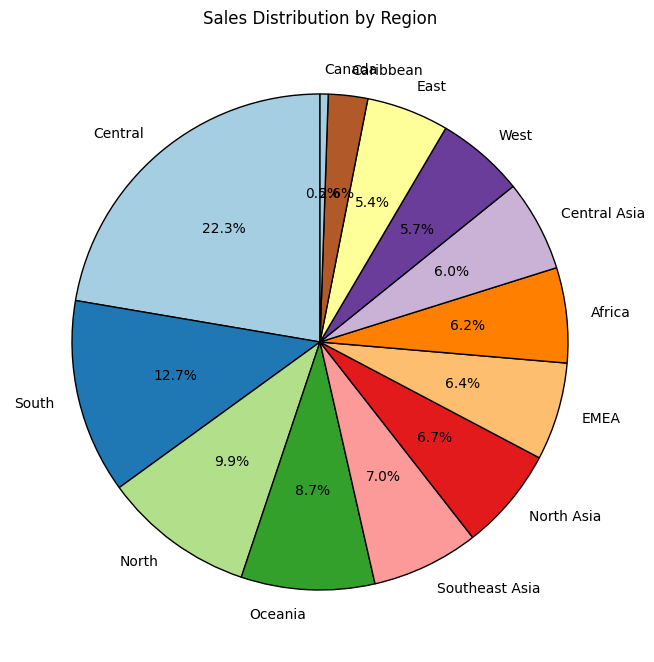

In [25]:
# Step 1: Group by Region and calculate total sales
region_sales = orders_df.groupby("Region")["Sales"].sum().sort_values(ascending=False)

# Step 2: Plot Sales by Region as a Pie Chart
plt.figure(figsize=(8, 9))
region_sales.plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90,
    colors=plt.cm.Paired.colors,

    wedgeprops={"edgecolor": "black"}
)
plt.title("Sales Distribution by Region")
plt.ylabel("")  # Hides the default ylabel
plt.show()


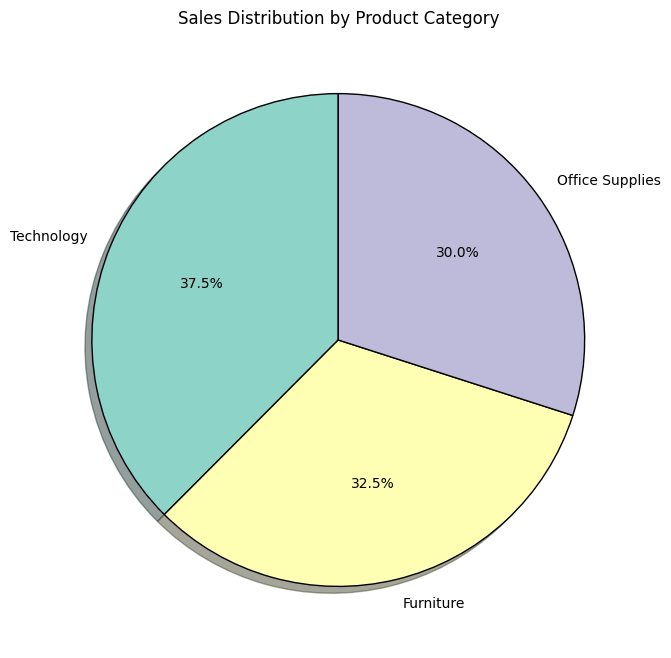

In [26]:
# Step 1: Group by Category and calculate total sales
category_sales = orders_df.groupby("Category")["Sales"].sum().sort_values(ascending=False)

# Step 2: Plot Sales by Category as a Pie Chart
plt.figure(figsize=(8, 8))
category_sales.plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90,
    colors=plt.cm.Set3.colors,
    shadow=True,
    wedgeprops={"edgecolor": "black"}
)
plt.title("Sales Distribution by Product Category")
plt.ylabel("")  # Hide the y-label
plt.show()



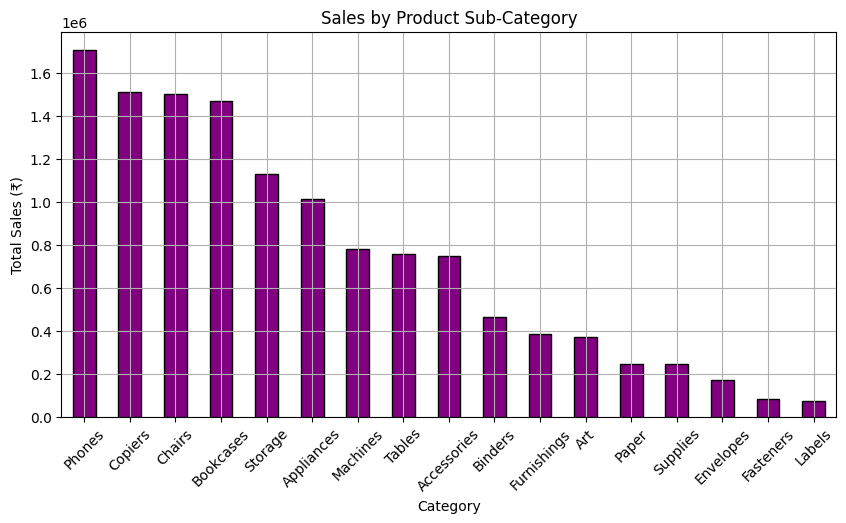

In [27]:
# Step 1: Group by Category and calculate total sales
category_sales = orders_df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False)

# Step 2: Plot Sales by Category
plt.figure(figsize=(10, 5))
category_sales.plot(kind="bar", color="purple", edgecolor="black")
plt.xlabel("Category")
plt.ylabel("Total Sales (₹)")
plt.title("Sales by Product Sub-Category")
plt.xticks(rotation=45)
plt.grid()
plt.show()


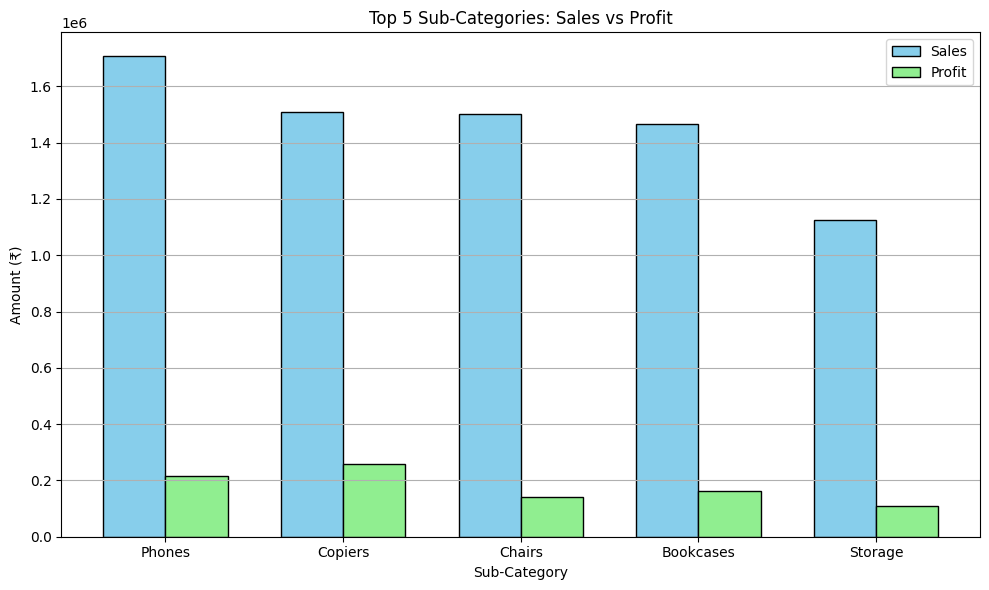

In [28]:
import numpy as np

# Step 1: Group by Sub-Category and calculate total Sales and Profit
subcat_compare = orders_df.groupby("Sub-Category")[["Sales", "Profit"]].sum()

# Step 2: Select Top 5 Sub-Categories by Sales
top5_subcat = subcat_compare.sort_values(by="Sales", ascending=False).head(5)

# Step 3: Extract data
subcats = top5_subcat.index
sales = top5_subcat["Sales"]
profit = top5_subcat["Profit"]

# Step 4: Set bar positions
x = np.arange(len(subcats))
width = 0.35

# Step 5: Plot grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, sales, width, label="Sales", color="skyblue", edgecolor="black")
plt.bar(x + width/2, profit, width, label="Profit", color="lightgreen", edgecolor="black")

# Step 6: Labels & customization
plt.xlabel("Sub-Category")
plt.ylabel("Amount (₹)")
plt.title("Top 5 Sub-Categories: Sales vs Profit")
plt.xticks(x, subcats)
plt.legend()
plt.grid(axis="y")
plt.tight_layout()
plt.show()


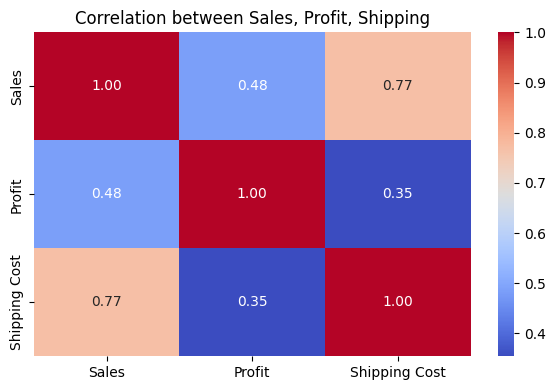

In [29]:
import seaborn as sns

# Select numeric columns
corr_matrix = orders_df[["Sales", "Profit", "Shipping Cost"]].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Sales, Profit, Shipping")
plt.tight_layout()
plt.show()


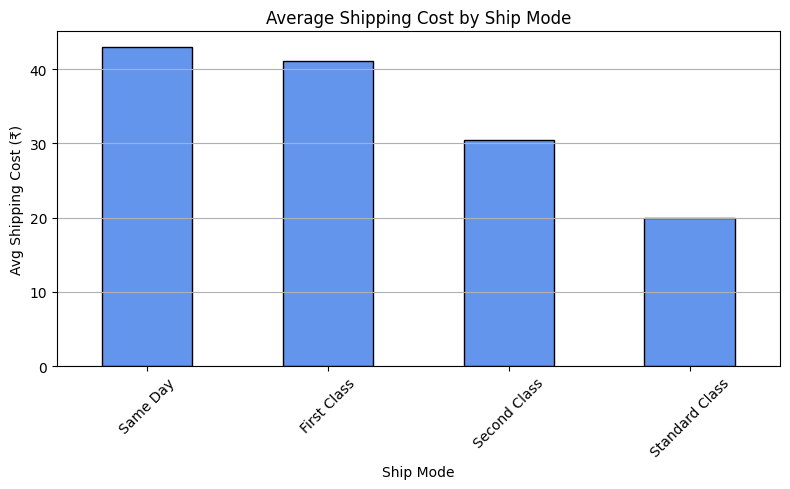

In [30]:
# Group by Ship Mode and calculate average Shipping Cost
shipmode_shipping = orders_df.groupby("Ship Mode")["Shipping Cost"].mean().sort_values(ascending=False)

# Plotting
shipmode_shipping.plot(kind="bar", figsize=(8, 5), color="cornflowerblue", edgecolor="black")
plt.title("Average Shipping Cost by Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Avg Shipping Cost (₹)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


In [31]:
import pandas as pd

# Load Excel data
df = pd.read_excel('/content/ECOMM DATA.xlsx')  # Replace with your exact file path if different

# Optional: check the top few rows
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [33]:
# Filter loss-making entries
loss_data = df[df['Profit'] < 0]

# Display first few loss rows
loss_data.head()
# Count of loss-making orders
loss_count = loss_data.shape[0]
print(f"Total Loss-Making Orders: {loss_count}")

# Total amount lost
total_loss = loss_data['Profit'].sum()
print(f"Total Loss Amount: ₹{total_loss:.2f}")



Total Loss-Making Orders: 12544
Total Loss Amount: ₹-920646.16


<ipython-input-34-f93ddab826d6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loss_by_subcat.values, y=loss_by_subcat.index, palette='Reds_r')


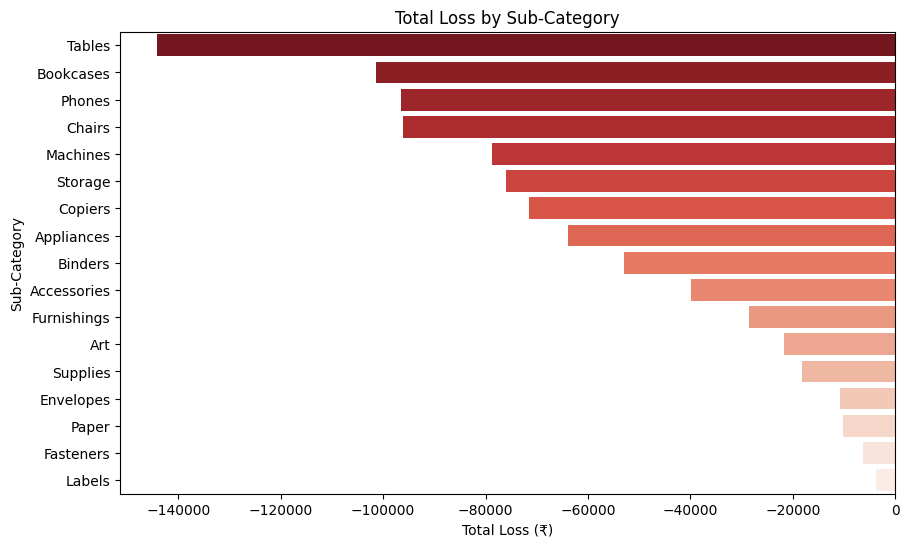

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by sub-category and sum loss
loss_by_subcat = loss_data.groupby('Sub-Category')['Profit'].sum().sort_values()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=loss_by_subcat.values, y=loss_by_subcat.index, palette='Reds_r')
plt.title('Total Loss by Sub-Category')
plt.xlabel('Total Loss (₹)')
plt.ylabel('Sub-Category')
plt.show()
